Author: **Diogo Cortiz**

Link: https://www.youtube.com/watch?v=ecYpXd4WREk

In [22]:
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from IPython.display import Image 

# FAZENDO O DOWNLOAD DO DATASET
!pip install wget
!wget https://raw.githubusercontent.com/diogocortiz/Crash-Course-IA/master/ArvoreDecis%C3%A3o/dataset_einstein.csv


# IMPORTANDO O DATASET PARA O DATAFRAME
df = pd.read_csv('dataset_einstein.csv', delimiter=';')

# MOSTRANDO AS PRIMEIRAS CINCO LINHAS
print(df.head(5))

count_row = df.shape[0]  # PEGANDO OS NÚMEROS DE REGISTROS
count_col = df.shape[1]  # PEGANDO OS NUMEROS DE COLUNAS

print(count_row)
print(count_col)
# REPAREM QUE HÁ MUITOS REGISTROS EM QUE HÁ DADOS FALTANDO NOS CAMPOS 





--2021-04-15 03:49:00--  https://raw.githubusercontent.com/diogocortiz/Crash-Course-IA/master/ArvoreDecis%C3%A3o/dataset_einstein.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248868 (243K) [text/plain]
Saving to: ‘dataset_einstein.csv.3’

dataset_einstein.cs 100%[===================>] 243.04K  --.-KB/s    in 0.05s   

2021-04-15 03:49:00 (4.56 MB/s) - ‘dataset_einstein.csv.3’ saved [248868/248868]

        Patient ID  Patient age quantile  ... Proteina C reativa mg/dL  Creatinine
0  44477f75e8169d2                    13  ...                      NaN         NaN
1  126e9dd13932f68                    17  ...                -0.147895    2.089928
2  a46b4402a0e5696                     8  ...                      NaN         NaN
3  f7d619a94f97c45         

Precisamos deixar o dataset somente com os registros que tenham todos os campos (para evitar ruídos e distorções)

In [23]:
# REMOVENDO OS REGISTROS NOS QUAIS PELO MENOS UM CAMPO ESTÁ EM BRANCO (NAN) 
df = df.dropna()

print(df.head(5))

print('Quantidade de campos(colunas): ', df.shape[1])
print('Total de registros:', df.shape[0])

#VAMOS VERIFICAR SE O BANCO DE DADOS ESTÁ BALANCEADO OU DESBALANCEADO
print ('Total de registros negativos: ', df[df['SARS-Cov-2 exam result'] =='negativos'].shape[0])
print ('Total de registros positivos: ', df[df['SARS-Cov-2 exam result'] =='positive'].shape[0])


         Patient ID  Patient age quantile  ... Proteina C reativa mg/dL  Creatinine
1   126e9dd13932f68                    17  ...                -0.147895    2.089928
8   8bb9d64f0215244                     1  ...                -0.286986   -1.838623
28  fc41531ca4faf1e                    13  ...                -0.434025   -0.701411
29  891d0f6449ff3d7                    14  ...                -0.529401    0.332418
30  ebdd7c67fcb21b4                     9  ...                 0.545572    1.021638

[5 rows x 11 columns]
Quantidade de campos(colunas):  11
Total de registros: 357
Total de registros negativos:  0
Total de registros positivos:  55


Precisamos converter o Dataframe para um Array Numpy, que é o tipo de dados que iremos usar no treinamento. Também iremos já separar o Dataset em dois. Um com as features de entrada, e outro com os labels (etiquetas, rótulos do registro).   

Neste caso, estamos tentando fazer um classificador para o teste do Covid, neste caso, queremos treinar o nosso modelo com a etiqueta presente no campo 'SARS-Cov-2 exam result'

In [24]:
# VAMOS JOGAR AS ETIQUETAS PARA Y
Y = df['SARS-Cov-2 exam result'].values 
print(Y)

# X SERÁ A NOSSA MATRIZ COM AS FEATURES
# VAMOS PEGAR OS CAMPOS DE TREINAMENTO (Hemoglobin, Leukocytes, Basophils, Proteina C reativa mg/dL)

X = df[['Hemoglobin', 'Leukocytes', 'Basophils','Proteina C reativa mg/dL']].values

# VAMOS MOSTRAR X 
print(X)




['negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'positive' 'negative' 'negat

Agora precisamos dividir o nosso Dataset em dois: um para o treino (70% dos dados) e outro para o teste (30% dos dados)

In [25]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.3, random_state=3)


Agora vamos criar o e treinar o nosso modelo. Lembram da diferença entre algortimo e modelo? Existe o algortimo de treinamento (que neste caso é o de árvore de decisão) que irá exportar um modelo treinado (que também é um algoritmo).

In [26]:
# CRIAR UM ALGORTIMO QUE SERÁ DO TIPO DE ÁRVORE DE DECISÃO

algortimo_arvore = DecisionTreeClassifier(criterion='entropy', max_depth=5)
# AGORA EM MINHA_ARVORE EU TENHO ASSOCIADA A ELA O ALGORITMO DE TREINAMENTO, 
# BASICAMENTE A RECEITA QUE VIMOS NA PARTE TÉORICA. 

#AGORA PRECISAMOS TREINÁ-LA
modelo = algortimo_arvore.fit(X_treino, Y_treino)




A árvore de decisão pode ser considerada um modelo White Box, ou seja, um modelo que podemos entender melhor o que ele aprendeu e como ele decide. Podemos mostrar a árvore para isso. 

[0.21854479 0.50084534 0.18308689 0.09752298]


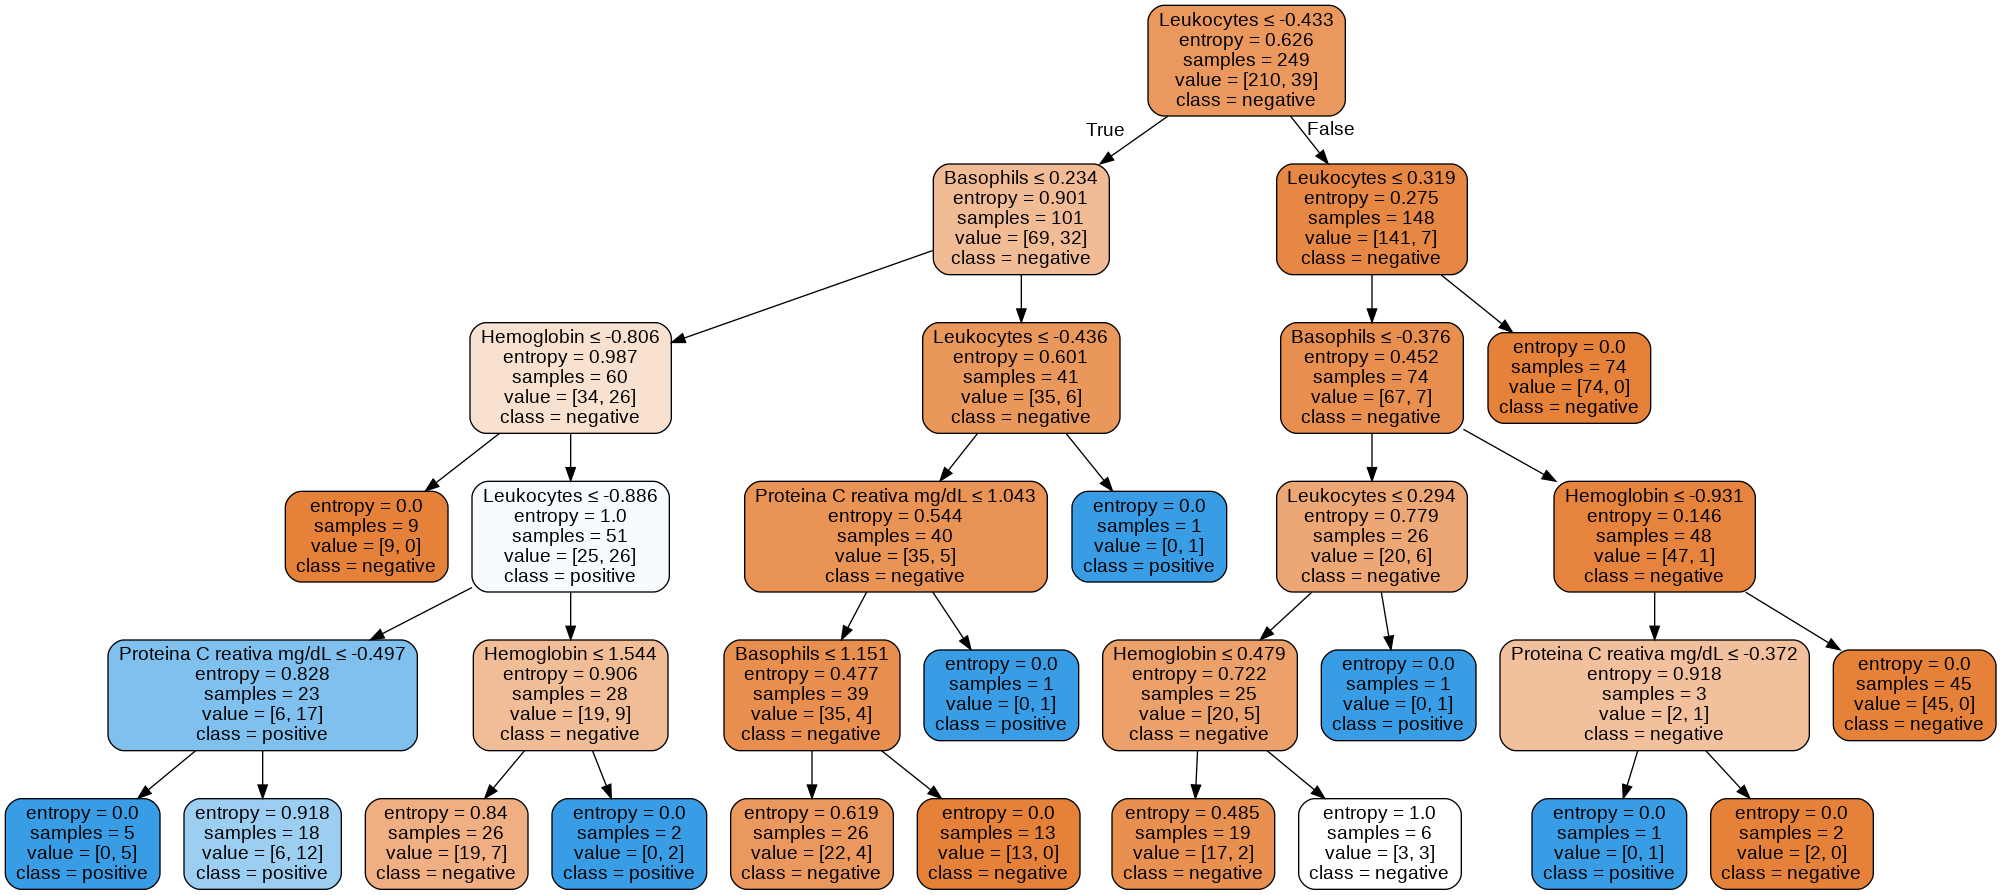

In [27]:
#PODEMOS MOSTRAR A FEATURE MAIS IMPORTANTE (WHITE BOX?)
print (modelo.feature_importances_)


nome_features = ['Hemoglobin', 'Leukocytes', 'Basophils','Proteina C reativa mg/dL']
nome_classes = modelo.classes_

# MONTAR A IMAGEM DA ÁRVORE
dot_data = StringIO()
#dot_data = tree.export_graphviz(my_tree_one, out_file=None, feature_names=featureNames)
export_graphviz(modelo, out_file=dot_data, filled=True, feature_names=nome_features, class_names=nome_classes, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
graph.write_png("arvore.png")
Image('arvore.png')



E podemos entender também quais as features de maior importância para o modelo treinado

[1 0 2 3]


Feature ranking:
1. feature 1 (0.500845)
2. feature 0 (0.218545)
3. feature 2 (0.183087)
4. feature 3 (0.097523)


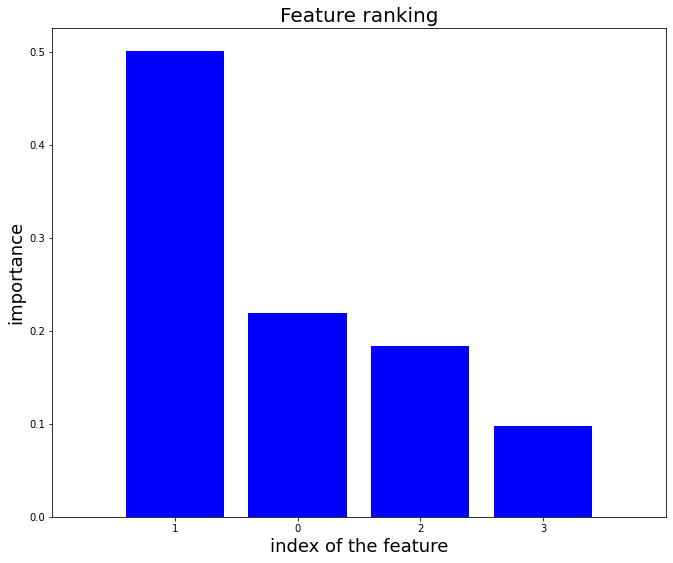

In [28]:
importances = modelo.feature_importances_
indices = np.argsort(importances)[::-1]
print(indices)
print("\n")
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
f, ax = plt.subplots(figsize=(11, 9))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(X.shape[1]), importances[indices],
    color="b", 
    align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)
plt.show()

#Indice das features
# 0 - 'Hemoglobin', 
# 1 - 'Leukocytes'
# 2 - 'Basophils',
# 3 - 'Proteina C reativa mg/dL']


Vamos testar o modelo, fazendo as predições no dataset de teste.

In [29]:
# APLICANDO O MODELO NA BASE DE TESTES E ARMAZENDO O RESULTADO EM Y_PREDICOES
Y_predicoes = modelo.predict(X_teste)

#AVALIAÇÃO DO MODELO 
#VAMOS AVALIAR O VALOR REAL DO DATASET Y_TESTE COM AS PREDIÇÕES
print("ACURÁCIA DA ÁRVORE: ", accuracy_score(Y_teste, Y_predicoes))
print (classification_report(Y_teste, Y_predicoes))

# PRECISÃO: DAS CLASSIFICAÇÕES QUE O MODELO FEZ PARA UMA DETERMINADA CLASSE
# RECALL: DOS POSSÍVEIS DATAPOINTS PERTECENTES A UMA DETERMINADA CLASSE


ACURÁCIA DA ÁRVORE:  0.8518518518518519
              precision    recall  f1-score   support

    negative       0.88      0.96      0.92        92
    positive       0.50      0.25      0.33        16

    accuracy                           0.85       108
   macro avg       0.69      0.60      0.62       108
weighted avg       0.82      0.85      0.83       108



Vamos entender a Matriz de Confusão

Matriz de Confusão sem normalizacão 
[[88  4]
 [12  4]]


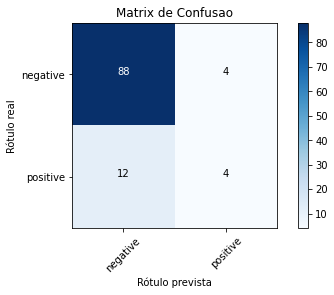

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusão Normalizada")
    else:
        print('Matriz de Confusão sem normalizacão ')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Rótulo real')
    plt.xlabel('Rótulo prevista')

matrix_confusao = confusion_matrix(Y_teste, Y_predicoes)
plt.figure()
plot_confusion_matrix(matrix_confusao, classes=nome_classes,
                      title='Matrix de Confusao')